In [34]:
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
pathCSV='books.csv'

In [36]:
df=pd.read_csv(pathCSV)

Q-1) How many rows and columns are there in books.csv dataset?

In [37]:
countRows, countColumns=df.shape
print(f"The dataset has {countRows} rows and {countColumns} columns.")

The dataset has 399 rows and 24 columns.


Q-2) How many books do not have an original title?

In [38]:
booksWithoutOriginalTitle=df[df['original_title'].isnull()].shape[0]
print(f"There are {booksWithoutOriginalTitle} books without an original title.")

There are 36 books without an original title.


Q-3) How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

Remove null values in the original title column

In [39]:
dfRemovedNull=df.dropna(subset=['original_title'])

Count the number of unique books based on 'book_id'

In [40]:
uniqueBooks=dfRemovedNull['book_id'].nunique()
print(f"There are {uniqueBooks} unique books based on the 'book_id' after removing null values in the 'original_title' column.")

There are 363 unique books based on the 'book_id' after removing null values in the 'original_title' column.


Q-4) What is the average rating of all the books in the dataset based on ‘average_rating’?

In [41]:
averageRating=df['average_rating'].mean()
print(f"The average rating of all the books in the dataset is: {averageRating:.2f}")

The average rating of all the books in the dataset is: 3.98


Q-5) Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

Books based on original publication year of 2000

In [42]:
booksPublication=df[df['original_publication_year']==2000]

Count the number of books published in the year '2000'.

In [43]:
countBooksPublished=booksPublication.shape[0]
print(f"The number of books published in the year 2000 is: {countBooksPublished}")

The number of books published in the year 2000 is: 8


Q-6) Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

Books with the maximum number of rating

In [44]:
maxRatingBook=df.loc[df['work_ratings_count'].idxmax()]

Title of the book

In [45]:
bookTitle=maxRatingBook['title']
print(f"The book with the maximum number of ratings is: {bookTitle}")

The book with the maximum number of ratings is: The Diary of a Young Girl


Q-7) Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

elements are  [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] 

In [46]:
ele=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]

Bucket the average ratings

In [54]:
df['bucketRating']=pd.cut(df['average_rating'],ele,right=False)

count in each bucket

In [55]:
countBucket=df['bucketRating'].value_counts().sort_index()
print(countBucket)

bucketRating
[0.0, 0.5)      0
[0.5, 1.0)      0
[1.0, 1.5)      0
[1.5, 2.0)      0
[2.0, 2.5)      0
[2.5, 3.0)      0
[3.0, 3.5)      7
[3.5, 4.0)    191
[4.0, 4.5)    199
[4.5, 5.0)      2
Name: count, dtype: int64


plot- Bar graph

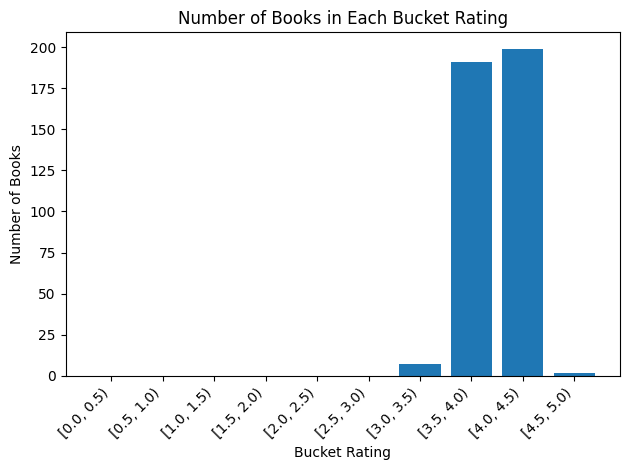

In [56]:
plt.bar(countBucket.index.astype(str), countBucket)
plt.xlabel('Bucket Rating')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Bucket Rating')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()